# Kmeans and Kmeans++

In [28]:
from random import uniform

import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## load and visualise sample dataset

In [4]:
# load dataset
from sklearn import datasets
iris = datasets.load_iris()

In [34]:
X_train = iris['data']
y = iris['target']
label_names = iris['feature_names']

X_train = StandardScaler().fit_transform(X_train)

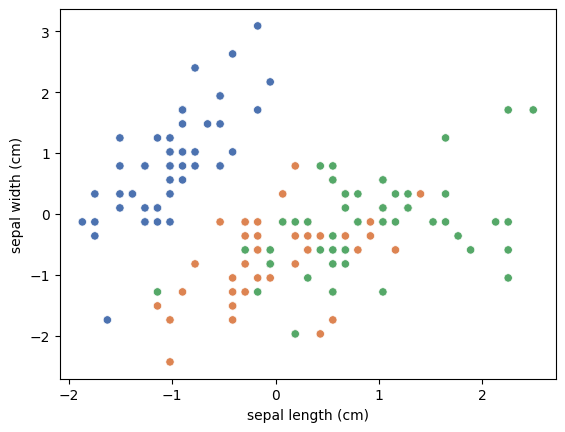

In [36]:
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=y,
                palette="deep",
                legend=None
                )
plt.xlabel(label_names[0])
plt.ylabel(label_names[1])
plt.show()

## Helper functions

In [3]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

## Kmeans

In [58]:
min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
centroids = [uniform(min_, max_) for _ in range(3)]
centroids

[array([-0.65907259, -0.90022302, -0.63663298, -0.57005523]),
 array([-0.1950515 , -0.31251962, -0.27990747, -0.23399194]),
 array([1.16635287, 1.41175972, 0.76669941, 0.75199349])]

In [62]:
sorted_points = [[] for _ in range(5)]
for x in X_train:
    dists = euclidean(x, centroids)
    centroid_idx = np.argmin(dists)
    sorted_points[centroid_idx].append(x)

In [42]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Randomly select centroid start points, uniformly distributed across the domain of the dataset
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0 # initialise  counter to keep track of iterations
        prev_centroids = None
        
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idx

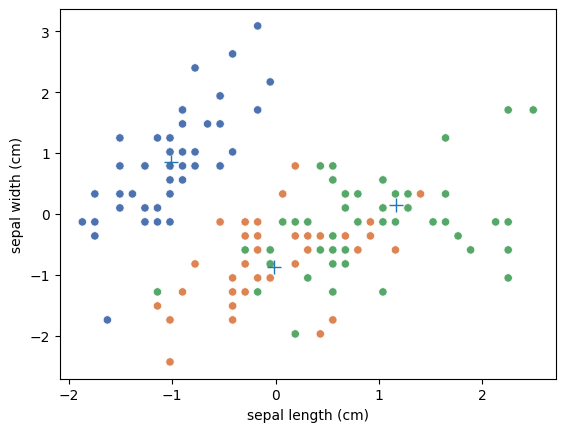

In [54]:
centers = 3

kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=y,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _, _, _ in kmeans.centroids],
         [y for _, y, _, _ in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.xlabel(label_names[0])
plt.ylabel(label_names[1])
plt.show()

## Evaluation

In [ ]:
  
# Calculate clustering metrics
silhouette = silhouette_score(X_train, np.array(labels))
db_index = davies_bouldin_score(X_train, np.array(labels))
ch_index = calinski_harabasz_score(X_train, np.array(labels))
ari = adjusted_rand_score(y, np.array(labels))
mi = mutual_info_score(y, np.array(labels))